In [1]:
#Set up libraries and functions

import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib as plt
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
jobs = pd.read_csv('out.csv', delimiter='\t')
jobs = jobs.drop(jobs.columns[[0]], axis=1)

In [3]:
#Only use words from list for job title

count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1,1), max_df=1.0, min_df=1, max_features=150)
count_vec.fit(jobs.job_title)
key_words = count_vec.get_feature_names()
key_words = [element for element in key_words if all(digit not in element for digit in "1234567890")]
remove = ['dbs', 'google', 'ihpc', 'immediate', 'nuhs', 'river', 'valley', 'year', 'singapore',\
          'months', 'days', 'school', 'ref', 'contract']
for i in remove:
    if i in key_words:
        key_words.remove(i)

jobs.role_description = jobs.role_description + jobs.job_requirements
jobs = jobs.drop(columns = 'job_requirements', axis=1)

for i in range(len(jobs)):
    title = jobs.job_title[i].lower()
    word_tokens = word_tokenize(title) 
    filtered_sentence = []  
    for w in word_tokens: 
        if w in key_words:
            filtered_sentence.append(w)
    separator = ' '
    sentence = separator.join(filtered_sentence)
    jobs.iloc[i,2] = sentence
    jobs.iloc[i,11] = str(jobs.iloc[i,11]).replace('\n', ' . ').lower()

In [4]:
print(key_words)

['account', 'admin', 'administrator', 'advisory', 'ai', 'algorithm', 'analyst', 'analytics', 'apac', 'application', 'applications', 'architect', 'architecture', 'artificial', 'asia', 'assistant', 'associate', 'assurance', 'audit', 'avp', 'backend', 'banking', 'bi', 'big', 'business', 'center', 'central', 'centre', 'cloud', 'compliance', 'computer', 'consultant', 'consulting', 'consumer', 'content', 'control', 'crime', 'crm', 'customer', 'data', 'database', 'deep', 'deputy', 'designer', 'developer', 'development', 'devops', 'digital', 'director', 'division', 'engineer', 'engineering', 'enterprise', 'executive', 'fellow', 'finance', 'financial', 'group', 'hardware', 'head', 'hr', 'human', 'infocomm', 'information', 'infrastructure', 'insights', 'intelligence', 'java', 'junior', 'key', 'language', 'lead', 'learning', 'lecturer', 'level', 'machine', 'management', 'manager', 'marketing', 'master', 'mid', 'migration', 'networking', 'office', 'officer', 'operations', 'ops', 'orchard', 'pionee

In [5]:
#Fill seniority as Professional if blank
jobs.seniority = jobs.seniority.fillna("Professional")

#Make salary and year numerical
jobs.iloc[:,6] = jobs.iloc[:,6].str.replace(r'\D+', '')
jobs.iloc[:,8] = jobs.iloc[:,8].str.replace(r'\D+', '')
jobs.iloc[:,9] = jobs.iloc[:,9].str.replace(r'\D+', '')
jobs.iloc[:,6] = pd.to_numeric(jobs.iloc[:,6])
jobs.iloc[:,8] = pd.to_numeric(jobs.iloc[:,8])
jobs.iloc[:,9] = pd.to_numeric(jobs.iloc[:,9])

jobs['district'] = 0
#Fill empty address with 000000
jobs.address = jobs.address.fillna(value = '000000')

#Change annual salaries into monthly
for i in jobs.index:
    if jobs.iloc[i,10] == 'Annually':
        jobs.iloc[i,10] = 'Monthly'
        jobs.iloc[i,8] = jobs.iloc[i,8]/12
        jobs.iloc[i,9] = jobs.iloc[i,9]/12
    #Get Postcode from address
    jobs.iloc[i,13] = jobs.address[i][-6:-4]
    
    #Split skills into lsit
    jobs.skills[i] = jobs.skills[i][2:-2].split("', '")
    jobs.seniority[i] = jobs.seniority[i].split(", ")
    jobs.employment_type[i] = jobs.employment_type[i].split(", ")
    jobs.job_category[i] = jobs.job_category[i].replace(' / ', ', ').replace(' , ', ', ').split(", ")
    
#Get middle of high and low salary.
jobs['salary_mid'] = (jobs.salary_low + jobs.salary_high)/2


#Filter results
jobs = jobs[jobs.job_title != '']
jobs = jobs[jobs.salary_low.notna()]
jobs = jobs[jobs.salary_mid < 30000]

jobs.reset_index(drop=True)
jobs.head()

/Users/yujihoshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yujihoshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yujihoshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yujihoshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value i

,link,company,job_title,address,employment_type,seniority,min_experience,job_category,salary_low,salary_high,salary_time,role_description,skills,district,salary_mid
0,https://www.mycareersfuture.sg/job/data-scient...,NTUC ENTERPRISE NEXUS CO-OPERATIVE LIMITED,data scientist,000000,[Full Time],[Executive],4.0,[Information Technology],3500.0,8000.0,Monthly,company description . ntuc enterprise co-opera...,"[Algorithms, Assay Development, Biochemistry, ...",00,5750.0
1,https://www.mycareersfuture.sg/job/data-scient...,OVERSEA-CHINESE BANKING CORPORATION LIMITED,data scientist,63 CHULIA STREET 049514,[Permanent],[Professional],6.0,[Banking and Finance],4800.0,8000.0,Monthly,develop data science solutions to support aml ...,"[Analysis, Business Analysis, Clinical Data Ma...",04,6400.0
2,https://www.mycareersfuture.sg/job/data-scient...,OVERSEA-CHINESE BANKING CORPORATION LIMITED,data scientist,63 CHULIA STREET 049514,[Permanent],[Professional],6.0,[Banking and Finance],8000.0,15000.0,Monthly,develop data science solutions to support aml ...,"[Analysis, Business Analysis, Clinical Data Ma...",04,11500.0
3,https://www.mycareersfuture.sg/job/signal-proc...,ARYAN SOLUTIONS PTE. LTD.,data engineer scientist,000000,[Permanent],[Professional],2.0,"[Engineering, Healthcare, Pharmaceutical]",3500.0,4500.0,Monthly,job responsibilities: . we are looking more fo...,"[AutoCAD, C, C++, Engineering, Integration, Ja...",00,4000.0
4,https://www.mycareersfuture.sg/job/data-scient...,PANASONIC ASIA PACIFIC PTE. LTD.,data scientist,202 BEDOK SOUTH AVENUE 1 469332,[Permanent],"[Executive, Junior Executive]",NaN,[Information Technology],3000.0,4600.0,Monthly,it consultant (data scientist) . the role . it...,"[Business Analysis, Business Intelligence, Cha...",46,3800.0


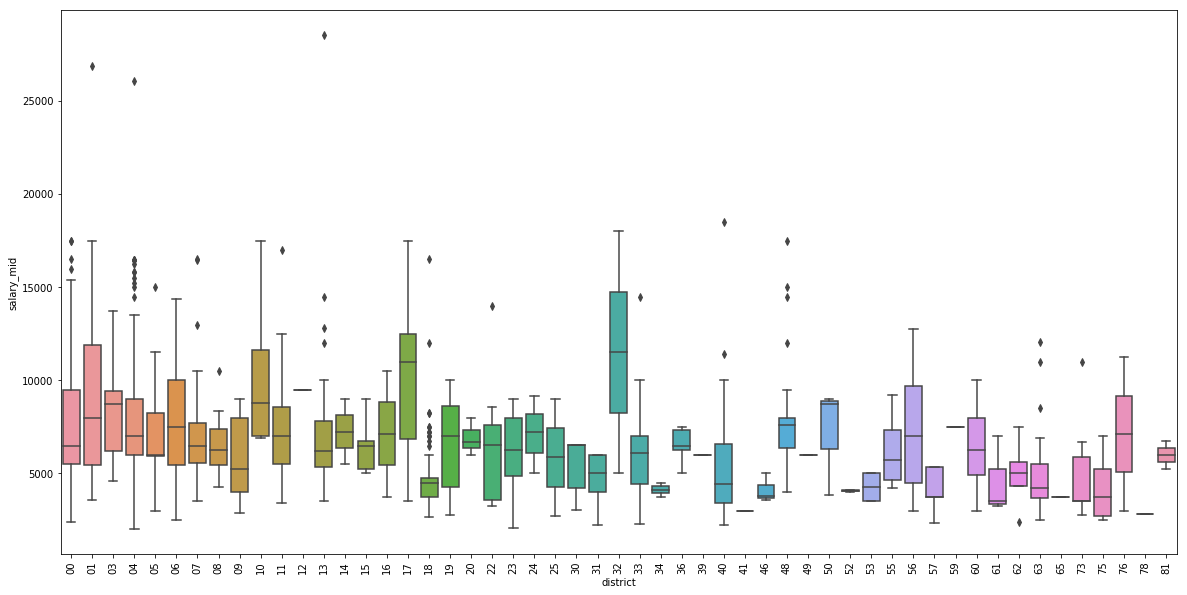

In [6]:
plt.rcParams['figure.figsize']=(20,10)
ax = sns.boxplot(data = jobs, x='district', y='salary_mid')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.pyplot.show()

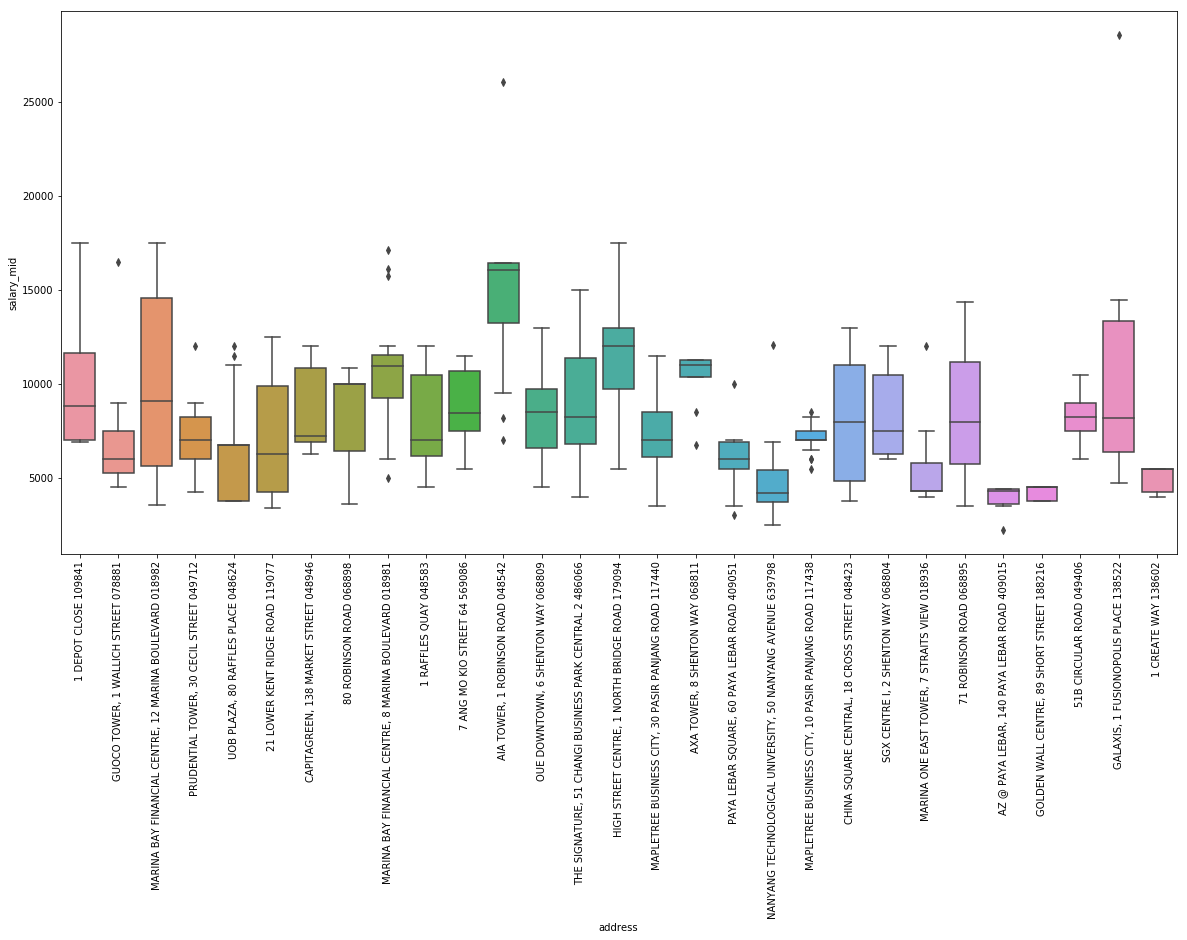

In [7]:
top_addresses = jobs.address.value_counts()[1:30].index
plt.rcParams['figure.figsize']=(20,10)
ax = sns.boxplot(data = jobs[jobs.address.isin(top_addresses)], x='address', y='salary_mid')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.pyplot.show()

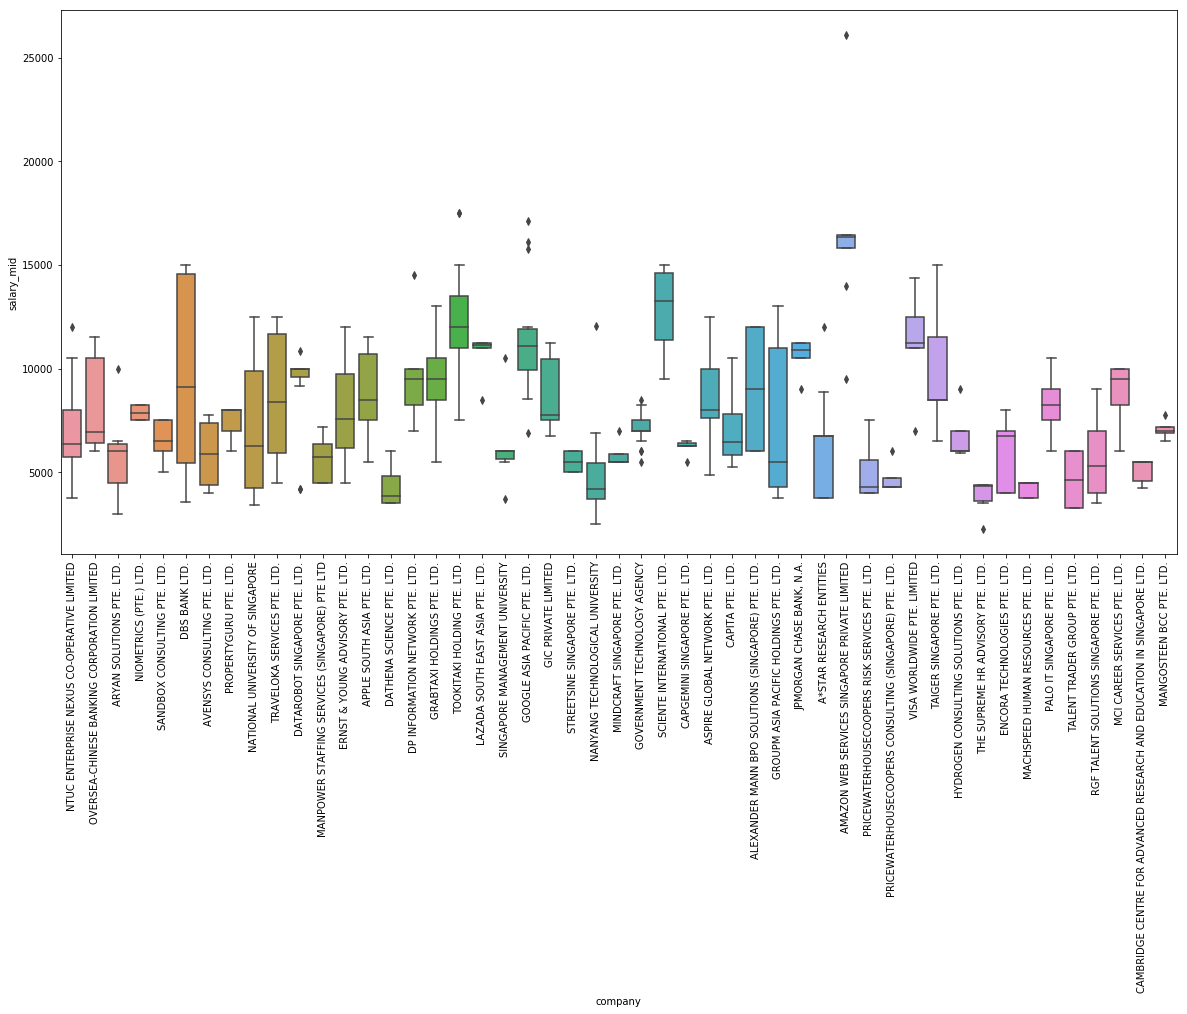

In [8]:
top_companies = jobs.company.value_counts()[1:50].index
plt.rcParams['figure.figsize']=(20,10)
ax = sns.boxplot(data = jobs[jobs.company.isin(top_companies)], x='company', y='salary_mid')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.pyplot.show()

In [9]:
test = ['data scientist', 'data analyst', 'data engineer', 'research', 'machine learning', 'deep learning']
for i in range(len(test)):
    matching = [s for s in jobs.job_title if test[i] in s]
    print(test[i], len(matching))

data scientist 94
data analyst 60
data engineer 93
research 102
machine learning 19
deep learning 12


In [10]:
jobs.job_title.value_counts()

data scientist                                                                     56
data engineer                                                                      39
research fellow                                                                    31
data analyst                                                                       30
data engineer orchard                                                              18
manager                                                                            16
key account manager                                                                15
research associate                                                                 15
software engineer                                                                  11
analyst                                                                            11
business analyst                                                                   10
project officer                                       

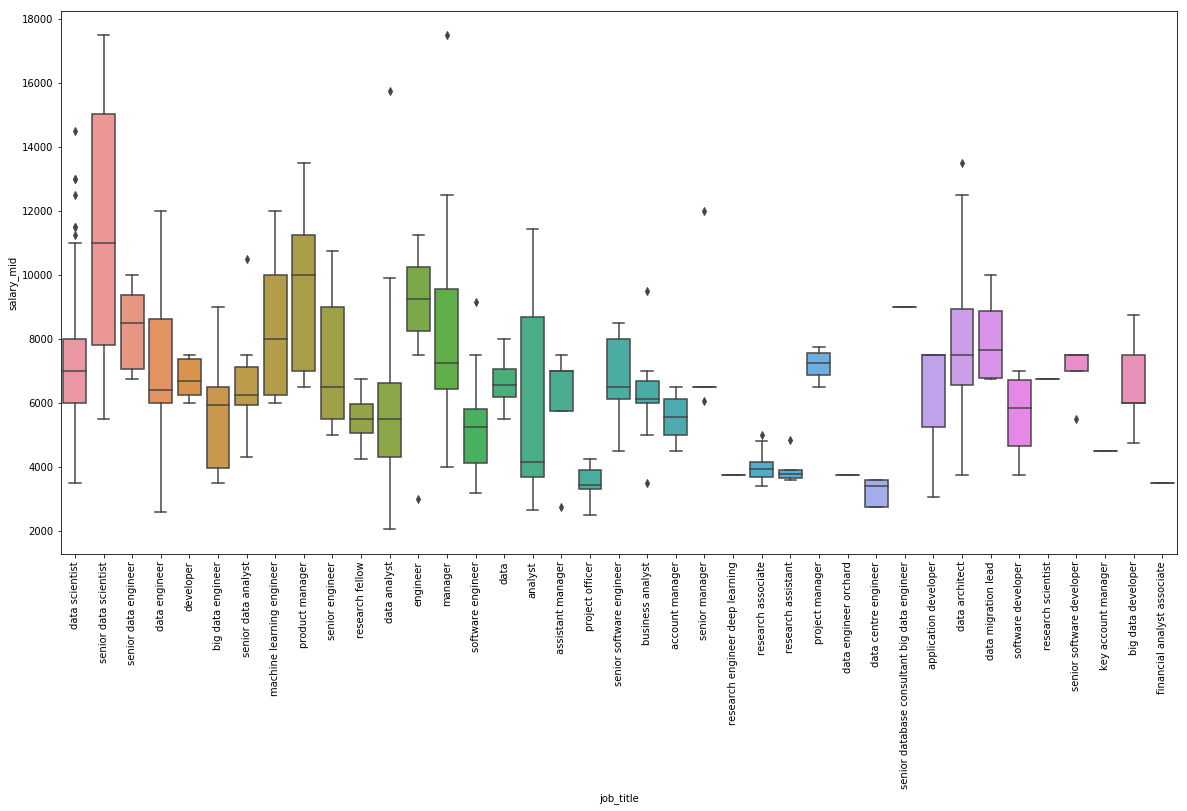

In [11]:
top_job_title = jobs.job_title.value_counts()[jobs.job_title.value_counts()>3].index
plt.rcParams['figure.figsize']=(20,10)
ax = sns.boxplot(data = jobs[jobs.job_title.isin(top_job_title)], x='job_title', y='salary_mid')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.pyplot.show()

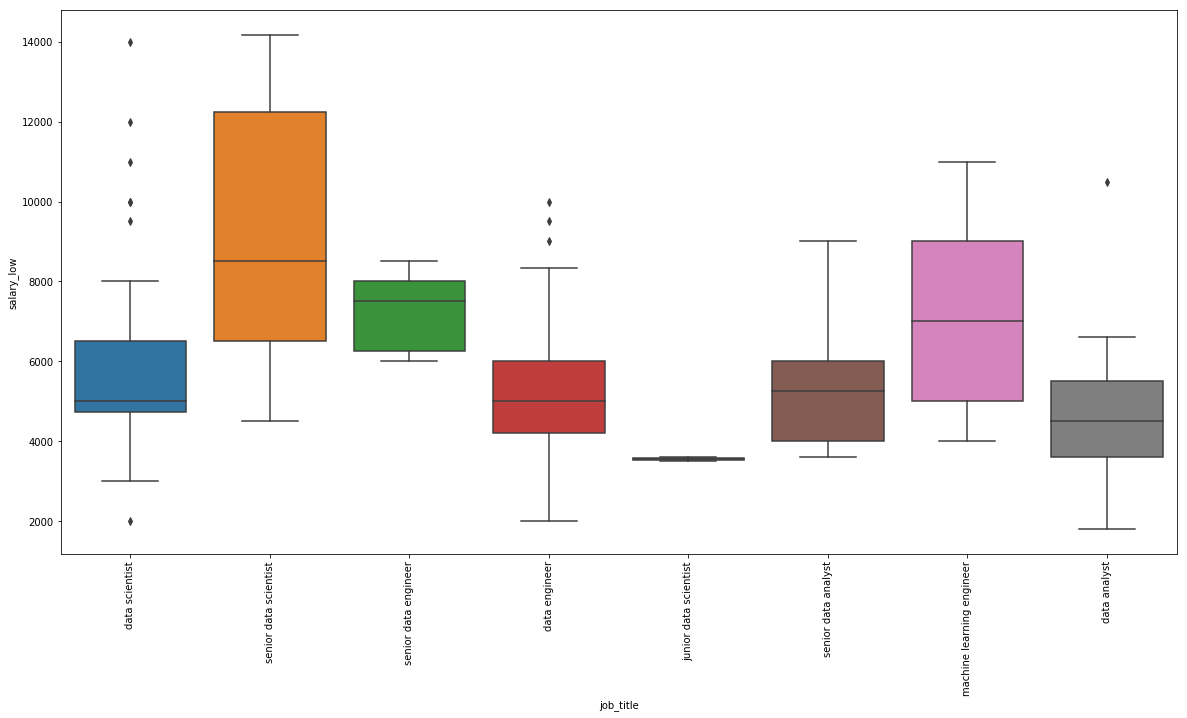

In [12]:
data_science_job_titles = ['data scientist', 'senior data scientist', 'junior data scientist',\
                           'data engineer', 'senior data engineer', 'data analyst', 'senior data analyst',\
                           'machine learning engineer']
plt.rcParams['figure.figsize']=(20,10)
ax = sns.boxplot(data = jobs[jobs.job_title.isin(data_science_job_titles)], x='job_title', y='salary_low')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.pyplot.show()

In [13]:
employment_type_dummies = pd.get_dummies(jobs.employment_type.apply(pd.Series)\
                                         .stack()).sum(level=0).drop(columns=['Freelance', 'Internship', 'Temporary'])
employment_type_dummies.head()

,Contract,Full Time,Permanent
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [14]:
low_job_category = jobs.job_category.apply(pd.Series).stack().value_counts()\
[jobs.job_category.apply(pd.Series).stack().value_counts()<5].index
job_category_dummies = pd.get_dummies(jobs.job_category.apply(pd.Series).stack()).sum(level=0).drop(columns = low_job_category)
job_category_dummies.head()

,Accounting,Admin,Advertising,Auditing,Banking and Finance,Building and Construction,Civil Service,Consulting,Customer Service,Design,...,Public Relations,R&D,Retail,Risk Management,Sales,Sciences,Secretarial,Supply Chain,Taxation,Telecommunications
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
seniority_dummies = pd.get_dummies(jobs.seniority.apply(pd.Series).stack()).sum(level=0)
seniority_dummies.head()

,Executive,Fresh/entry level,Junior Executive,Manager,Middle Management,Non-executive,Professional,Senior Executive,Senior Management
0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,0


In [16]:
low_skills = jobs.skills.apply(pd.Series).stack().value_counts()[jobs.skills.apply(pd.Series).stack().value_counts()<20].index
skills_dummies = pd.get_dummies(jobs.skills.apply(pd.Series).stack()).sum(level=0).drop(columns = low_skills)
skills_dummies.head()

,.NET,ASP.NET,Access,Account Management,Accounting,Active Directory,Advertising,Agile Methodologies,Algorithms,Analysis,...,Vendor Management,Virtualization,Visio,Web Applications,Web Development,Web Services,Windows,Windows Server,XML,jQuery
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [17]:
low_job_title = jobs.job_title.apply(pd.Series).stack().value_counts()\
[jobs.job_title.apply(pd.Series).stack().value_counts()<3].index
job_title_dummies = pd.get_dummies(jobs.job_title.apply(pd.Series).stack()).sum(level=0).drop(columns = low_job_title)
job_title_dummies.head()

,account manager,algorithm engineer,analyst,application developer,assistant manager,assistant professor,big data developer,big data engineer,business analyst,crm data analyst,...,senior data engineer,senior data scientist,senior database consultant big data engineer,senior engineer,senior manager,senior software developer,senior software engineer,software developer,software engineer,software engineer machine learning
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
low_company = jobs.company.value_counts()[jobs.company.value_counts()<3].index
company_dummies = pd.get_dummies(jobs.company.apply(pd.Series).stack()).sum(level=0).drop(columns = low_company)
company_dummies.head()

,101 DIGITAL PTE. LTD.,A*STAR RESEARCH ENTITIES,ADVANCE SOFTWARE ENGINEERING,ALEXANDER MANN BPO SOLUTIONS (SINGAPORE) PTE. LTD.,AMAZON WEB SERVICES SINGAPORE PRIVATE LIMITED,APL CO. PTE LTD,APPLE SOUTH ASIA PTE. LTD.,ARYAN SOLUTIONS PTE. LTD.,ASIACLOUD SOLUTIONS PRIVATE LIMITED,ASPIRE GLOBAL NETWORK PTE. LTD.,...,TALENT TRADER GROUP PTE. LTD.,THE SUPREME HR ADVISORY PTE. LTD.,TITANSOFT PTE. LTD.,TOOKITAKI HOLDING PTE. LTD.,TRAVELOKA SERVICES PTE. LTD.,TWITTER ASIA PACIFIC PTE. LTD.,U3 INFOTECH PTE. LTD.,VIKI PRIVATE LIMITED,VISA WORLDWIDE PTE. LIMITED,ZENIKA PTE. LTD.
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
dummies = [job_title_dummies, company_dummies, employment_type_dummies, job_category_dummies, seniority_dummies, skills_dummies]
for dummy in dummies:
    jobs = pd.concat([jobs, dummy], axis=1)

/Users/yujihoshi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


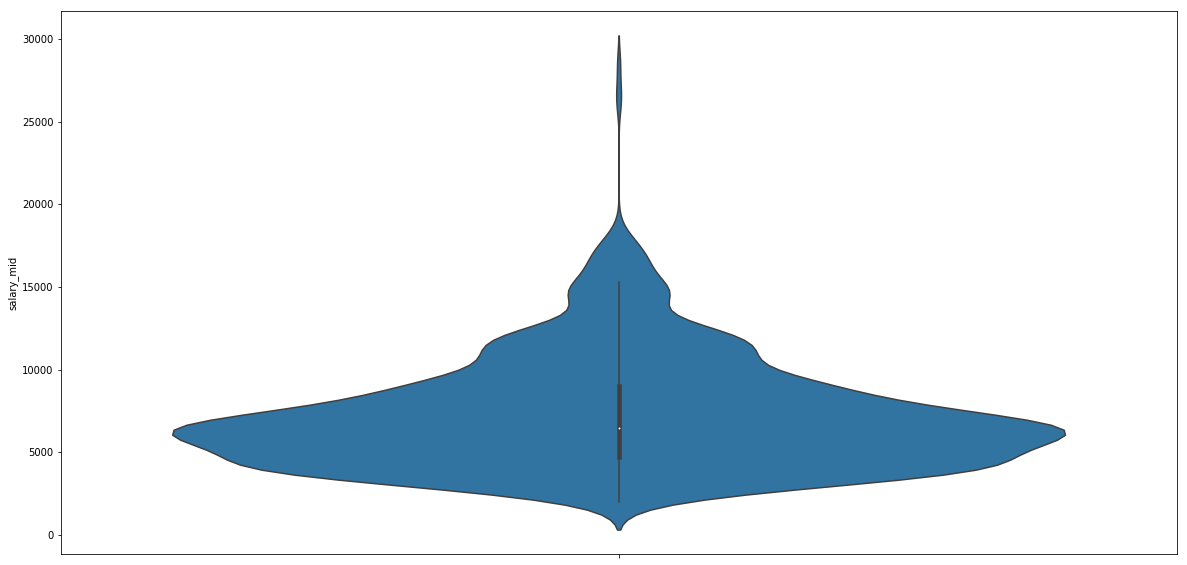

In [20]:
plt.rcParams['figure.figsize']=(20,10)
sns.violinplot(data = jobs, y='salary_mid')
plt.pyplot.show()

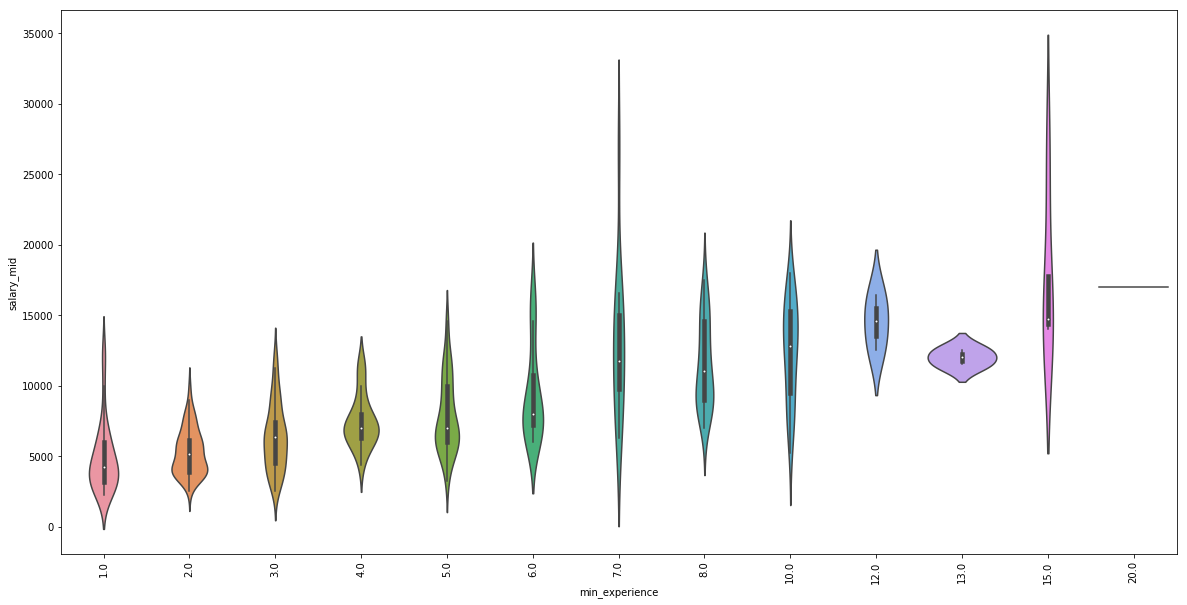

In [21]:
plt.rcParams['figure.figsize']=(20,10)
ax = sns.violinplot(data = jobs, x='min_experience', y='salary_mid')
#ax = sns.violinplot(data = jobs[jobs.min_experience.isnull()], y='salary_mid')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.pyplot.show()

In [22]:
jobs.head()

,link,company,job_title,address,employment_type,seniority,min_experience,job_category,salary_low,salary_high,...,Vendor Management,Virtualization,Visio,Web Applications,Web Development,Web Services,Windows,Windows Server,XML,jQuery
0,https://www.mycareersfuture.sg/job/data-scient...,NTUC ENTERPRISE NEXUS CO-OPERATIVE LIMITED,data scientist,000000,[Full Time],[Executive],4.0,[Information Technology],3500.0,8000.0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.mycareersfuture.sg/job/data-scient...,OVERSEA-CHINESE BANKING CORPORATION LIMITED,data scientist,63 CHULIA STREET 049514,[Permanent],[Professional],6.0,[Banking and Finance],4800.0,8000.0,...,0,0,0,0,0,0,0,0,0,0
2,https://www.mycareersfuture.sg/job/data-scient...,OVERSEA-CHINESE BANKING CORPORATION LIMITED,data scientist,63 CHULIA STREET 049514,[Permanent],[Professional],6.0,[Banking and Finance],8000.0,15000.0,...,0,0,0,0,0,0,0,0,0,0
3,https://www.mycareersfuture.sg/job/signal-proc...,ARYAN SOLUTIONS PTE. LTD.,data engineer scientist,000000,[Permanent],[Professional],2.0,"[Engineering, Healthcare, Pharmaceutical]",3500.0,4500.0,...,0,0,0,0,0,0,0,0,0,0
4,https://www.mycareersfuture.sg/job/data-scient...,PANASONIC ASIA PACIFIC PTE. LTD.,data scientist,202 BEDOK SOUTH AVENUE 1 469332,[Permanent],"[Executive, Junior Executive]",NaN,[Information Technology],3000.0,4600.0,...,0,0,0,0,0,0,0,1,1,0


In [23]:
jobs.to_csv('out2.csv', sep='\t')